# Introduction part

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics  #Import scikit-learn metrics module for accuracy calculation

Ones we have imported the libraries, we reed the dataset from the csv file and save as df

In [14]:
df = pd.read_csv(r"C:\Users\utente\Desktop\ESAMI SOSTENUTI\Advanced Machine Learning\diabetes.csv")

df.shape

(768, 9)

In [3]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

As we can see the dataset is composed by 768 rows and 9 column.
Let's see some more detail about the data.

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Data distribution


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

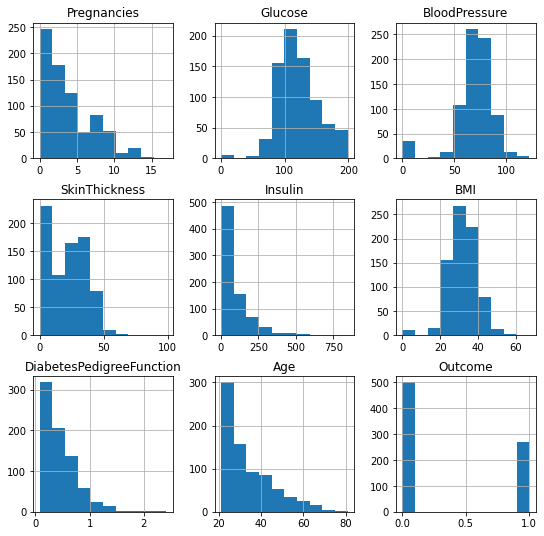

In [6]:
df.hist(figsize=(9, 9))

Box and Whisker plot to visualize the distribution of all variables


Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

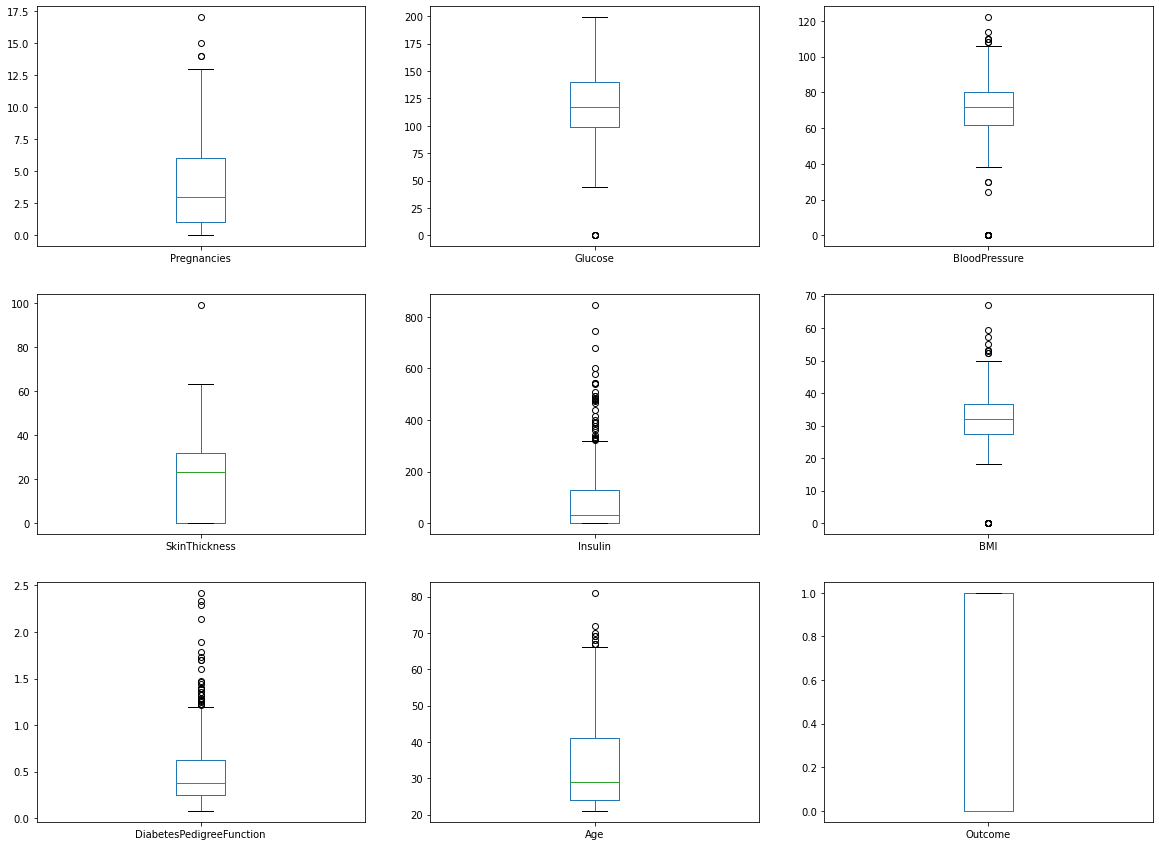

In [7]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))

# Bivariate Box plot

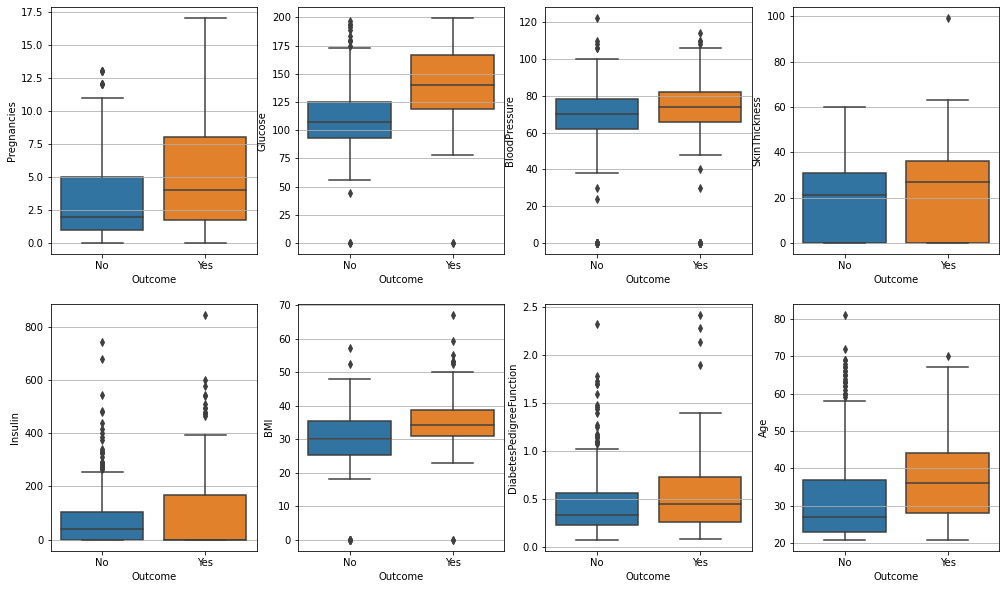

In [8]:
plt.figure( figsize=( 17.0, 10.0 ) )
for i in range( 8 ):
    plt.subplot( 2, 4, i + 1 )
    plt.grid( True )
    sn.boxplot( x='Outcome', y=df.columns[ i ], data=df )
    plt.xticks( [ 0, 1 ], [ 'No', 'Yes' ], rotation=0 )
#plt.tight_layout( True )
plt.show()

we count the number of zero observations to understand how to manage it


In [9]:
print("Total : ", df[df.Glucose == 0].shape[0]) #count the number of zero in Glucose
print(df[df.Glucose == 0].groupby('Outcome')['Age'].count())


Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [10]:
print("Total : ", df[df.BloodPressure == 0].shape[0]) #count the number of zero in Blood Pressure
print(df[df.BloodPressure == 0].groupby('Outcome')['Age'].count())

Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [11]:
print("Total : ", df[df.SkinThickness == 0].shape[0]) #count the number of zero in SkinThickness
print(df[df.SkinThickness == 0].groupby('Outcome')['Age'].count())

Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [12]:
print("Total : ", df[df.Insulin == 0].shape[0]) #count the number of zero in Insulin
print(df[df.Insulin == 0].groupby('Outcome')['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [13]:
print("Total : ", df[df.BMI == 0].shape[0]) #count the number of zero in BMI (body mass indicator)
print(df[df.BMI == 0].groupby('Outcome')['Age'].count())

Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

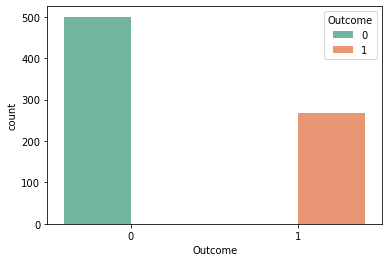

In [14]:
sn.countplot(x='Outcome',data=df,palette="Set2", hue='Outcome')

plotting for each feature their distribution related to non-Diabetic persons (in blu) and the Diabetic (in red)


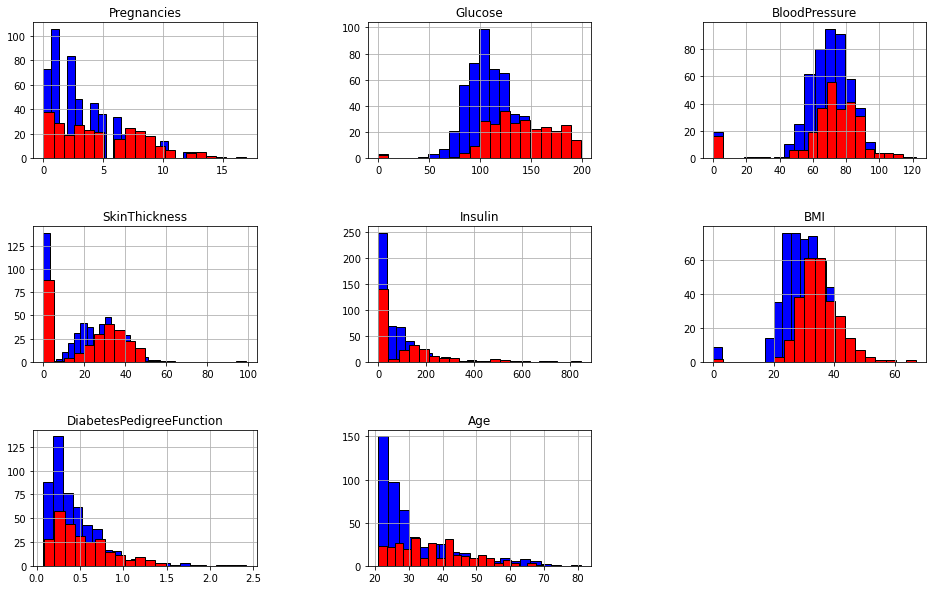

In [15]:
df_1 = df[df.Outcome == 1]
df_0 = df[df.Outcome == 0]
columns = df.columns[:-1]

plt.subplots(figsize=(16,10))
number_features = len(columns)
for i,j,  in zip(columns, range(number_features) ):
    plt.subplot(3,3,j+1)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    df_0[i].hist(bins=20, color='b', edgecolor='black')
    df_1[i].hist(bins=20, color='r', edgecolor='black')
    plt.title(i)

In [16]:
# we decided to replace the 0 values with the median 
df['BMI'] = df['BMI'].replace(0,df['BMI'].median())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].median())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].median())

# the alternative was to delete some variables BloodPressure, BMI and Glucose but we discovered that the accuracy was 
#much worse to respect holding these feature 

#diabetes = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)] #removing 0 values in BloodPressure,BMI and Glucose
#diabetes.shape[0]

In order to make comparable the different columns, we normalize the data using the Min-Max normalization

In [17]:
df_norm = (df - df.min()) / (df.max()-df.min())
df_norm.head(5)

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.353535  0.019832  0.314928   
1     0.058824  0.264516       0.428571       0.292929  0.019832  0.171779   
2     0.470588  0.896774       0.408163       0.000000  0.019832  0.104294   
3     0.058824  0.290323       0.428571       0.232323  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.353535  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0

We change the data-type of Outcome which is our target variable.
Now is integer, but as it can take anly value 1 or 0 we set it as boolean.

Now we can perform the the correlation matrix

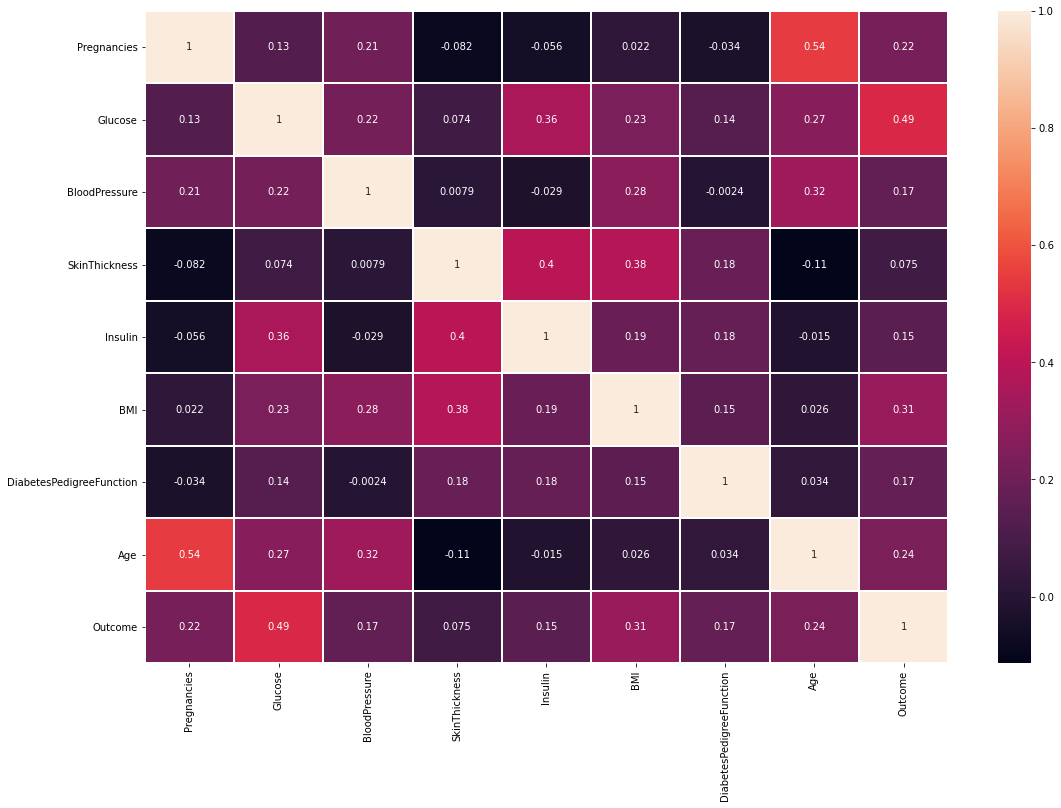

In [18]:
corr_matrix = df_norm.corr()
sn.heatmap(corr_matrix, annot=True, linewidths=1)
plt.gcf().set_size_inches(18, 12)


we can see the relation between the target variable and all the features

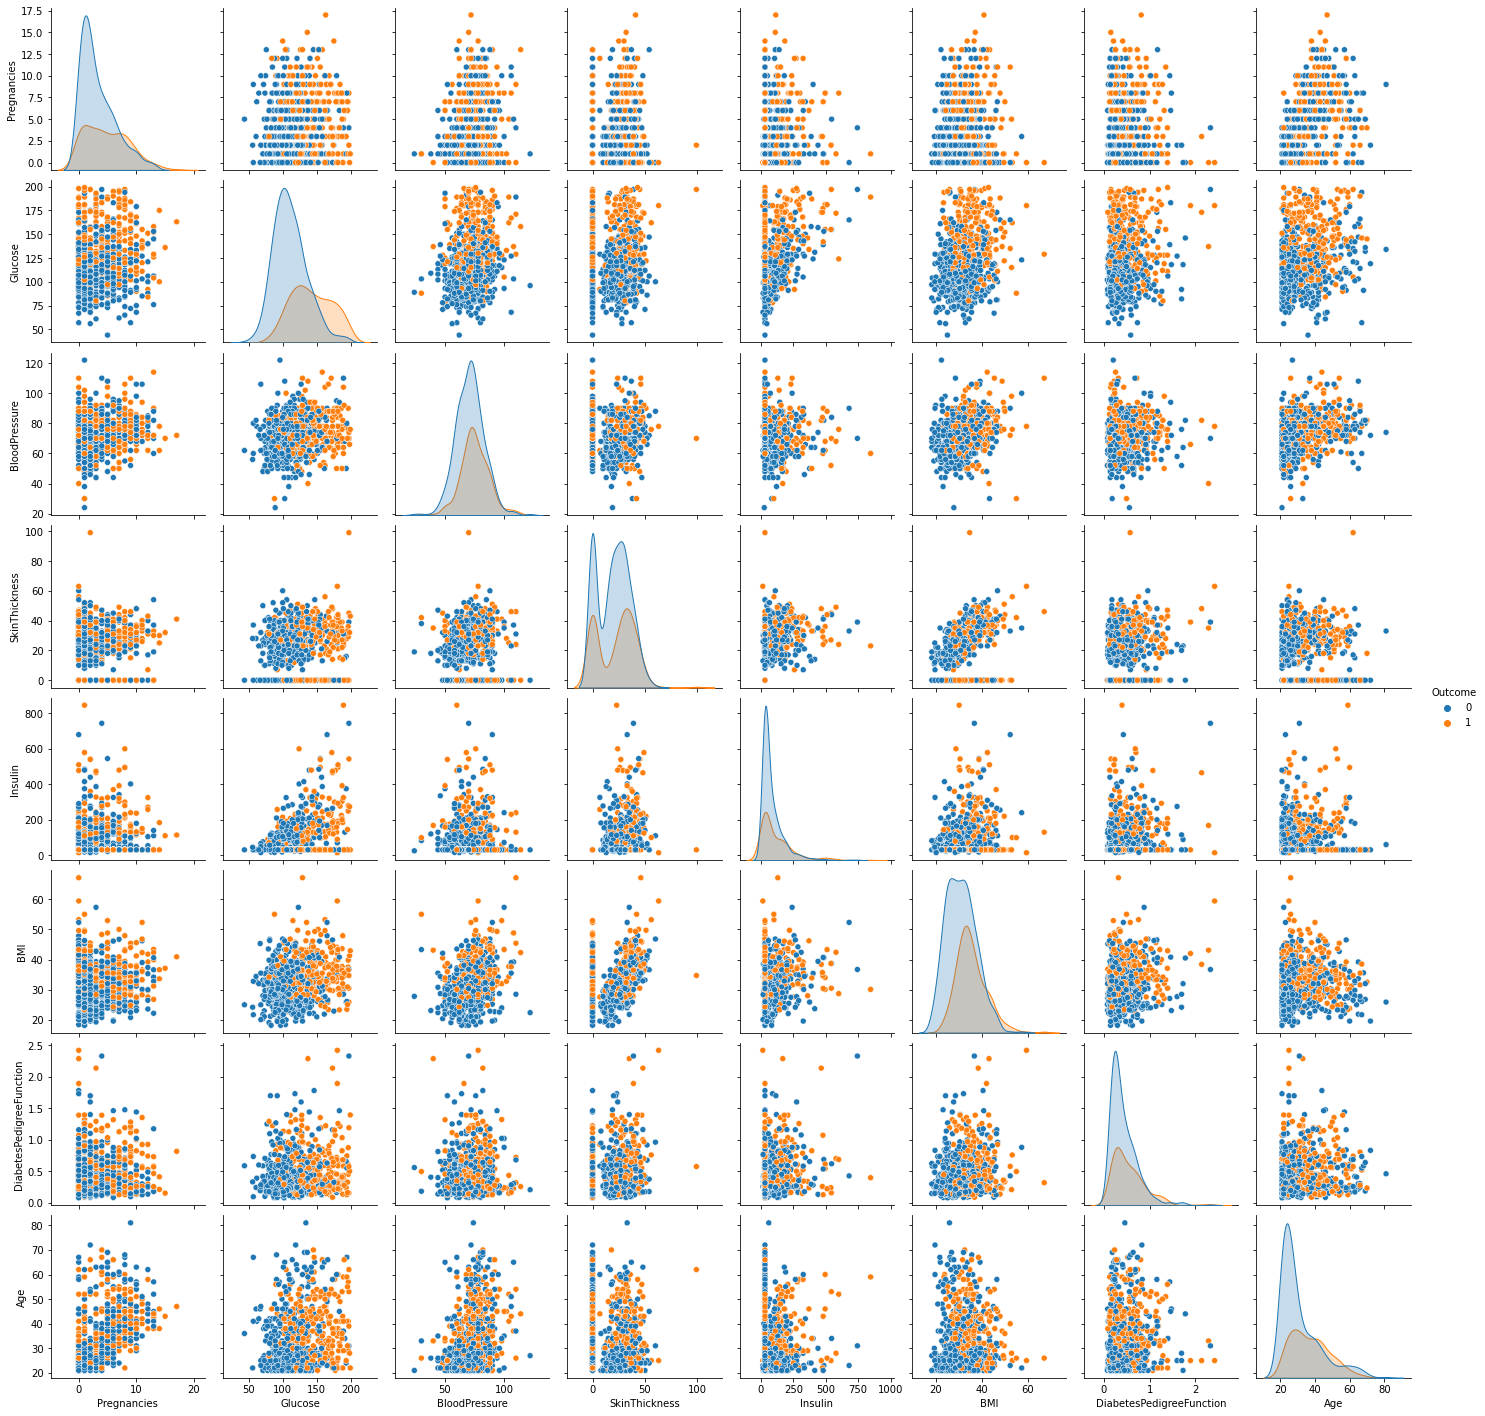

In [19]:
sn.pairplot(df, hue='Outcome')


representation of Glucose in relation with the Outcome


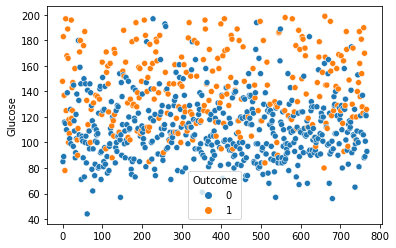

In [20]:
sn.scatterplot(x= df.index, y=df['Glucose'], hue=df['Outcome']);

##### In order to prepare the data for the analysis, we split the data in training and test set

In [21]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import StandardScaler


In [22]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']
X = df_norm[feature_cols] # Features
y = df_norm.Outcome.astype(int) # Target variable

#split dataset in features and target variable and standardize features
XX = df[feature_cols] # Features
scaler = StandardScaler()
XX = scaler.fit_transform(X)


We divide the data in: 70% training-set and 30% test-set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, y, test_size=0.3, random_state=1)


# Gaussian Naive Bayes model

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       146
           1       0.72      0.64      0.67        85

    accuracy                           0.77       231
   macro avg       0.76      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231

Accuracy: 0.7748917748917749
Sensitivity : 0.6352941176470588
Specificity : 0.8561643835616438


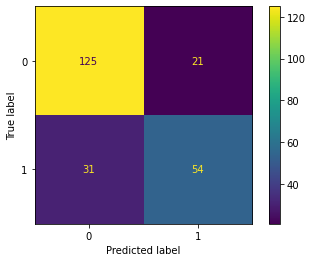

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score ,ConfusionMatrixDisplay


#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(XX_train, yy_train)
#Predict the response for test dataset
y_pred = gnb.predict(XX_test)




cm = confusion_matrix(yy_test, y_pred)
print(metrics.classification_report(yy_test, y_pred))
tn, fp, fn, tp = confusion_matrix(yy_test, y_pred).ravel()
sensitivity = tp/(tp+fn)
specificity  = tn/(tn+fp)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yy_test, y_pred))


print("Sensitivity :",sensitivity)  
print("Specificity :",specificity)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot()
plt.show()


# Logistic Regression

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       146
           1       0.69      0.78      0.73        85

    accuracy                           0.79       231
   macro avg       0.78      0.79      0.78       231
weighted avg       0.80      0.79      0.79       231

Accuracy of logistic regression classifier on test set: 0.792
Sensitivity : 0.7764705882352941
Specificity : 0.8013698630136986


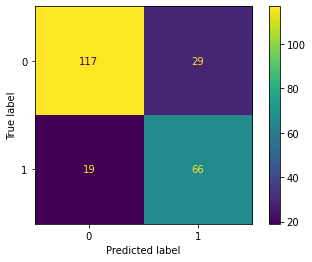

In [25]:
from sklearn.linear_model import LogisticRegression
#we also run the same code without class_weight
logreg = LogisticRegression(max_iter=100, C = 100, class_weight= 'balanced')
logreg.fit(XX_train, yy_train)
y_pred = logreg.predict(XX_test)

cm = confusion_matrix(yy_test, y_pred)
print(metrics.classification_report(yy_test, y_pred))
tn, fp, fn, tp = confusion_matrix(yy_test, y_pred).ravel()
sensitivity = tp/(tp+fn)
specificity  = tn/(tn+fp)



print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logreg.score(XX_test, yy_test)))
print("Sensitivity :",sensitivity)  
print("Specificity :",specificity)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

understand the contribution of each variable in logistic regression


Text(0.5, 0, 'Importance')

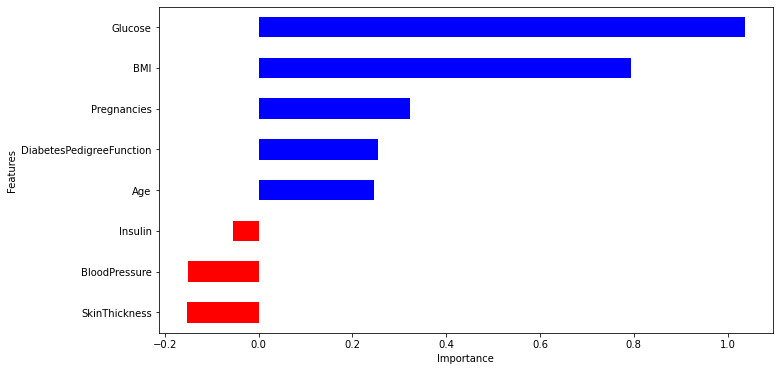

In [26]:
coeff= list(logreg.coef_[0])
labels = df.columns[:-1]
features = pd.DataFrame()
features['Features']= labels
features['importance']=coeff
features.sort_values(by=['importance'],ascending = True, inplace= True)
features['positive']= features['importance']>0
features.set_index('Features',inplace=True)
features.importance.plot(kind= 'barh', figsize= (11,6), color = features.positive.map({True: 'blue', False: 'red'}) )
plt.xlabel('Importance')

#glucose that is the feature with higher correlation has the biggest impact as was predictable

# Support Vector Machine

linear
0.7728119180633147
poly
0.8007448789571695
rbf
0.8268156424581006
sigmoid
0.6852886405959032
              precision    recall  f1-score   support

           0       0.89      0.79      0.84       146
           1       0.70      0.84      0.76        85

    accuracy                           0.81       231
   macro avg       0.80      0.81      0.80       231
weighted avg       0.82      0.81      0.81       231

Accuracy of Support vector machine  classifier on test set: 0.810
Sensitivity : 0.8352941176470589
Specificity : 0.7945205479452054


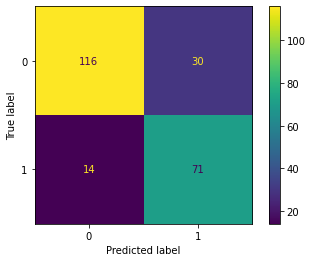

In [27]:
from sklearn import svm



# SVM Kernels : we choose the best score varying the kernel
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    model = svm.SVC(kernel=k)
    model.fit(XX_train, y_train)
    y_pred_ = model.predict(XX_train)
    print(k)
    print(accuracy_score(yy_train, y_pred_))

# now that we discovered rbf is the best kernel we run this passing the parameter class_weight=balanced

#SUPPORT VECTOR MACHINE
model_svm = svm.SVC(kernel='rbf' , class_weight='balanced')
model_svm.fit(XX_train, yy_train)
y_pred = model_svm.predict(XX_test)


cm = confusion_matrix(yy_test, y_pred)
print(metrics.classification_report(yy_test, y_pred))
tn, fp, fn, tp = confusion_matrix(yy_test, y_pred).ravel()
sensitivity = tp/(tp+fn)
specificity  = tn/(tn+fp)

print('Accuracy of Support vector machine  classifier on test set: {:.3f}'.format(model_svm.score(XX_test, yy_test)))
print("Sensitivity :",sensitivity)  
print("Specificity :",specificity)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_svm.classes_)
disp.plot()


### UnderSampling Function

In [28]:
import random

In [29]:
def sample_together(n, X, y):
    rows = random.sample(np.arange(0,len(X.index)).tolist(),n)
    return X.iloc[rows,], y.iloc[rows,]

In [30]:
def undersample(X, y, under = True):
    y_min = y[y == under]
    y_max = y[y != under]
    X_min = X.filter(y_min.index,axis = 0)
    X_max = X.filter(y_max.index,axis = 0)

    X_under, y_under = sample_together(len(y_min.index), X_max, y_max)
    
    X = pd.concat([X_under, X_min])
    y = pd.concat([y_under, y_min])
    return X, y


In [31]:
X_train_u, y_train_u = undersample(X_train, y_train)

# DECISION TREES (DTs)

In [32]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

First of all we build a decision tree using two different criterion, so using the gini index and the entropy.

### First configuration, using default parameters

In [33]:
#Building Decision Tree Model

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Accuracy can be computed by comparing actual test set values and predicted values.
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.696969696969697


In [34]:
#Building Decision Tree Model

clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Accuracy can be computed by comparing actual test set values and predicted values.

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7316017316017316


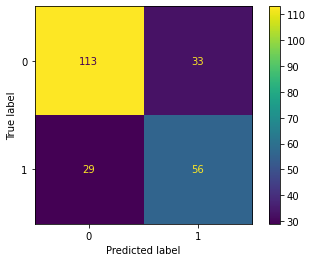

In [35]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

We can see that using as criterion entropy we obtain an higher accuracy.

#### Second configuration changing the max_depth parameter

In [36]:
# Create Decision Tree classifer object

clf = DecisionTreeClassifier(criterion="entropy", max_depth=7)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8008658008658008


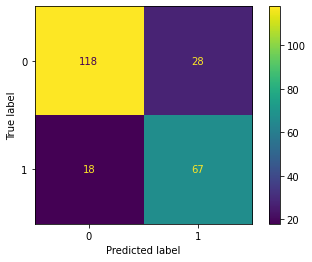

In [37]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


We can see that, using the model with entropy as criterion, max_depth=7, is the depth that more improve the accuracy of the model.

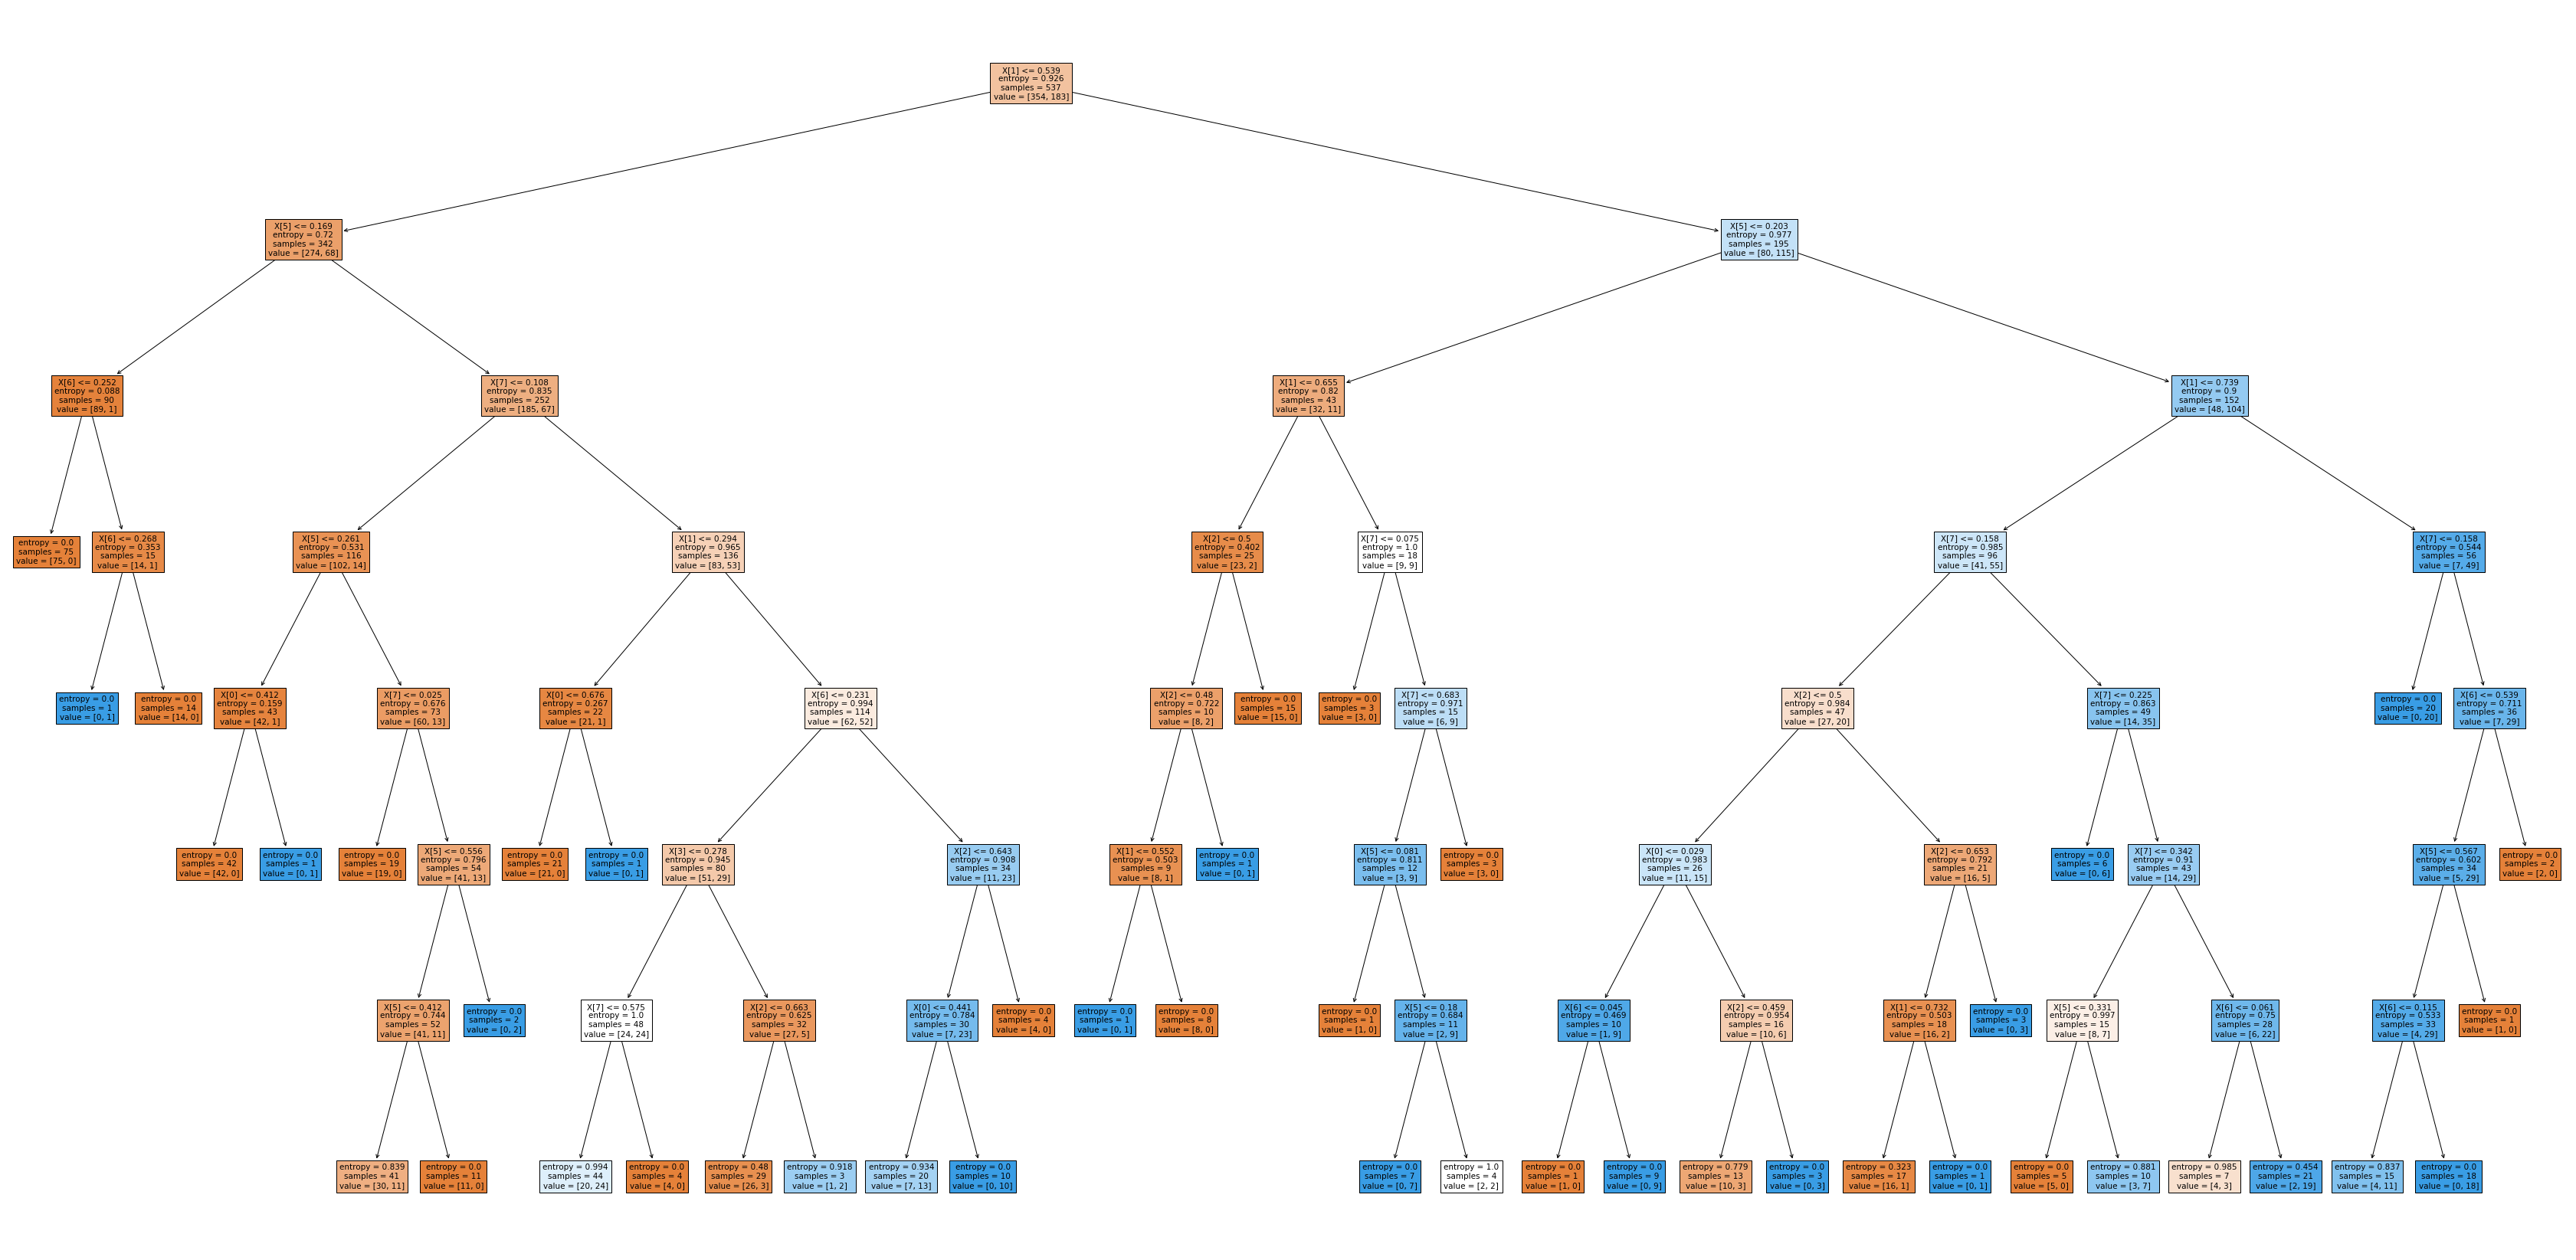

In [38]:
plt.figure(figsize=(60,30))
plot_tree(clf, filled=True);

In [39]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


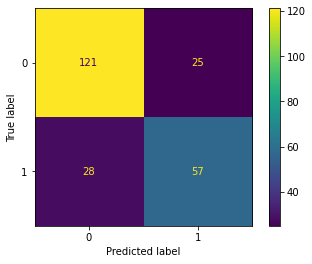

In [40]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

As for the previous model, we can see that, using the model with gini as criterion, max_depth=5, is the depth that more improve the accuracy of the model.

In [41]:
plt.figure(figsize=(200,100))
plot_tree(clf, filled=True);

#### pruning using cost complexity 

In [42]:
clf = DecisionTreeClassifier(criterion="entropy")

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
path=clf.cost_complexity_pruning_path(X_train,y_train)

alphas=path.ccp_alphas
alphas

array([0.        , 0.00372439, 0.00372439, 0.00372439, 0.0043734 ,
       0.0043734 , 0.00452025, 0.0047101 , 0.00513014, 0.00513014,
       0.00528098, 0.00558659, 0.00604304, 0.00604304, 0.00604304,
       0.00622326, 0.00624114, 0.00649324, 0.00665136, 0.00695594,
       0.00730225, 0.00738036, 0.00738644, 0.00769522, 0.00809779,
       0.00817572, 0.00831358, 0.00861233, 0.00873362, 0.00887155,
       0.00890295, 0.00892065, 0.00895534, 0.00899804, 0.00904051,
       0.0092473 , 0.00927091, 0.00935923, 0.00938172, 0.0096985 ,
       0.01041606, 0.0108307 , 0.01092892, 0.01114325, 0.01156851,
       0.01344722, 0.01355973, 0.02197292, 0.0222563 , 0.03299565,
       0.03427769, 0.05145214, 0.11263947])

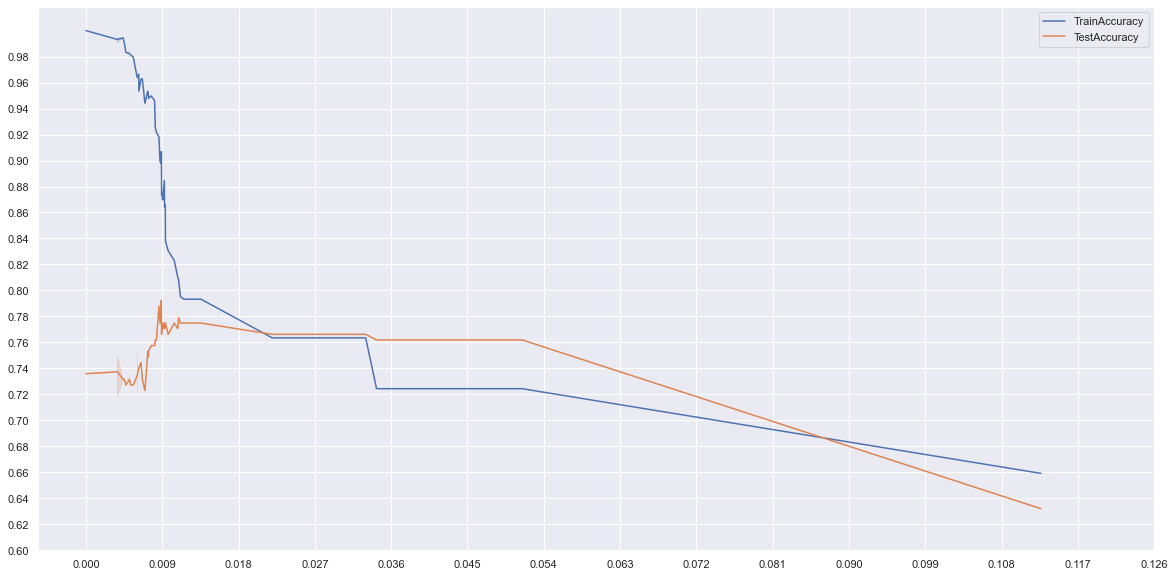

In [45]:

accuracy_train,accuracy_test=[],[]
for i in alphas: 
    clf = DecisionTreeClassifier(criterion= 'entropy', ccp_alpha=i)   
    clf.fit(X_train,y_train)
    y_train_pred=clf.predict(X_train)
    y_test_pred=clf.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))

sn.set()
plt.figure(figsize = (20, 10))
sn.lineplot(x=alphas, y=accuracy_train, label="TrainAccuracy")
sn.lineplot(x=alphas, y=accuracy_test, label="TestAccuracy")
plt.xticks(ticks=np.arange(0.00,0.13,0.009))
plt.yticks(ticks=np.arange(0.60,1.0,0.02))
plt. show()

In [46]:
clf = DecisionTreeClassifier(criterion= 'entropy',ccp_alpha=0.00887155)
clf.fit(X_train,y_train)

y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.9124767225325885 0.7965367965367965


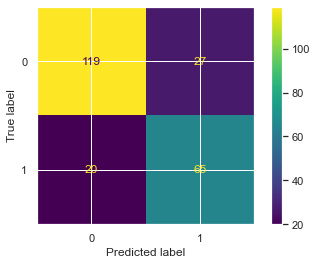

In [47]:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()


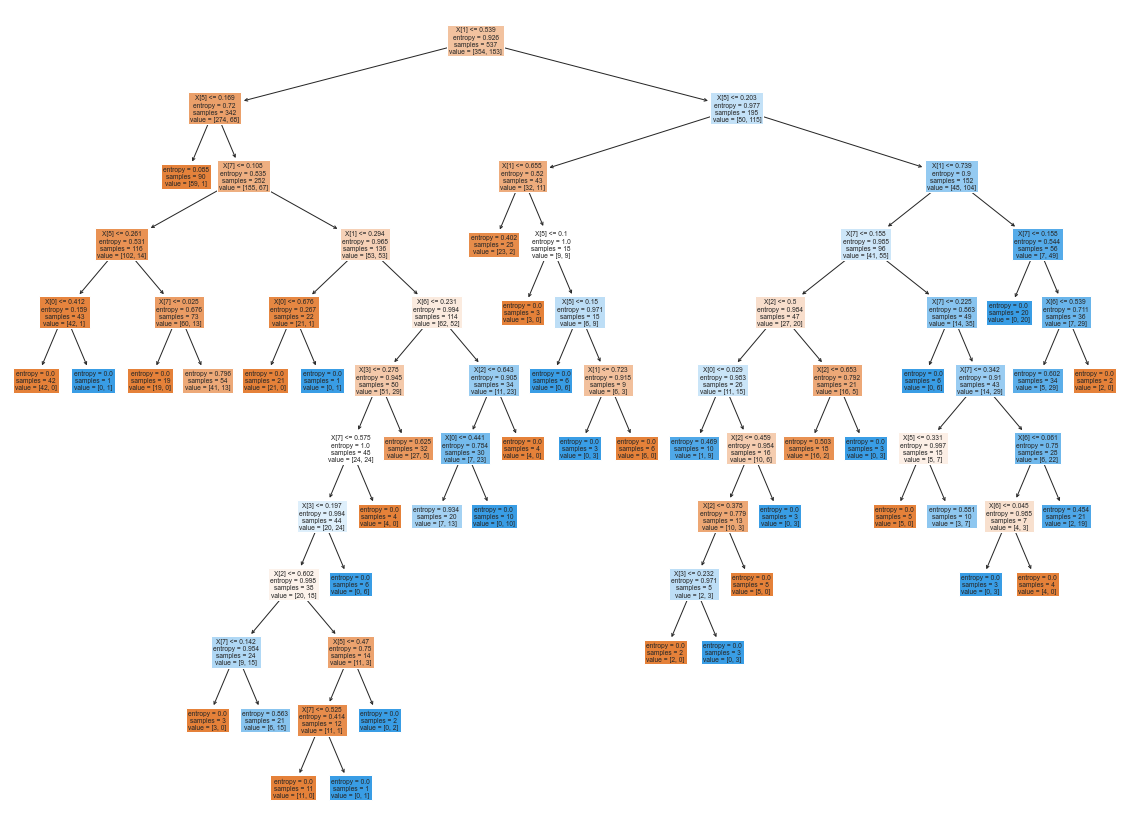

In [48]:
plt.figure(figsize=(20,15))
plot_tree(clf, filled=True);

# K-NEAREST NEIGHBOR

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

 scikit-learn implements two different nearest neighbors classifiers:

##### KNeighborsClassifier

KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where 
k is an integer value specified by the user.
The optimal choice of the value k is highly data-dependent.
The default value, weights = 'uniform', assigns equal weights to all points. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
KNN = KNeighborsClassifier(n_neighbors=7)
# Train the model using the training sets
KNN = KNN.fit(X_train, y_train)
#Predict Output
predicted = KNN.predict(X_test)

In [51]:
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7835497835497836


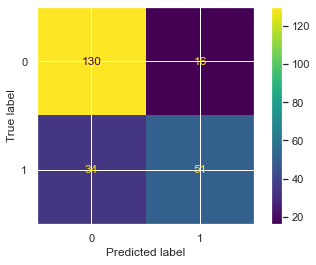

In [52]:
cm = confusion_matrix(y_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot()

In [53]:
KNN = KNeighborsClassifier(n_neighbors=9, weights="distance")

# Train the model using the training sets
KNN = KNN.fit(X_train, y_train)

#Predict Output
predicted = KNN.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7835497835497836


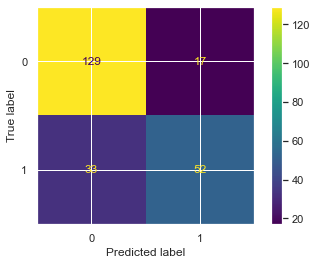

In [54]:
cm = confusion_matrix(y_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

following the result using undersampling

In [55]:
KNN = KNeighborsClassifier(n_neighbors=20, weights="distance")

# Train the model using the training sets
KNN = KNN.fit(X_train_u, y_train_u)

#Predict Output
predicted = KNN.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7835497835497836


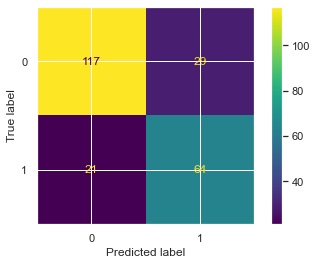

In [56]:
cm = confusion_matrix(y_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

#### RadiusNeighborsClassifier

RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.

In [57]:
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.datasets import make_classification

In [58]:
rnc = RadiusNeighborsClassifier(weights='distance',radius=0.689)

rnc = rnc.fit(X_train, y_train)

#Predict Output
pred = rnc.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, pred))



Accuracy: 0.7186147186147186


In [59]:
cr = classification_report(y_test, pred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.98      0.81       146
           1       0.88      0.27      0.41        85

    accuracy                           0.72       231
   macro avg       0.79      0.63      0.61       231
weighted avg       0.77      0.72      0.67       231



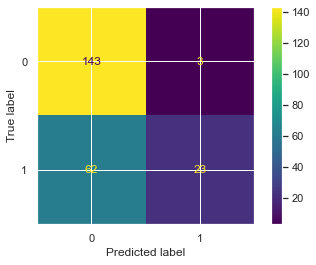

In [60]:
cm = confusion_matrix(y_test, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rnc.classes_)
disp.plot()

# Ensamble Methods

## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model = RandomForestClassifier(n_estimators=300, criterion="gini", max_features= 3)

# Train the model using the training sets
model = model.fit(X_train, y_train)

#Predict Output
predicted = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7835497835497836


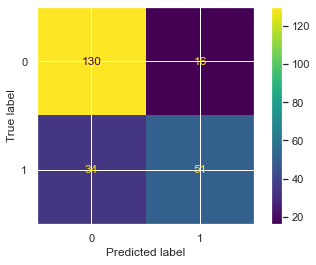

In [63]:
cm = confusion_matrix(y_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [64]:
model = RandomForestClassifier(n_estimators=300, criterion="entropy", max_features= 3)
# Train the model using the training sets
model = model.fit(X_train, y_train)

#Predict Output
predicted = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7835497835497836


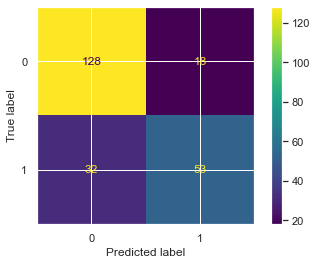

In [65]:
cm = confusion_matrix(y_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Bagging

In [66]:
from sklearn.ensemble import BaggingClassifier

In [67]:
# Instantiate the bagging classifier
#
bgclassifier = BaggingClassifier(svm.SVC(kernel="rbf", class_weight='balanced'), n_estimators= 200, max_features=5)


In [68]:
# Fit the bagging classifier
#
bgclassifier = bgclassifier.fit(XX_train, yy_train)
#

#Predict Output
predicted = bgclassifier.predict(XX_test)

print("Accuracy:", metrics.accuracy_score(yy_test, predicted))

Accuracy: 0.8225108225108225


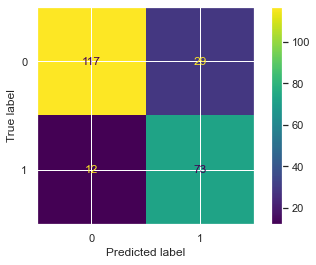

In [69]:
cm = confusion_matrix(y_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

## Boosting

### Adaboost

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
adabdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME.R", n_estimators=200)

# Fit the bagging classifier
adabdt = adabdt.fit(X_train, y_train)
                            

In [72]:
#Predict Output
predicted = adabdt.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.7965367965367965


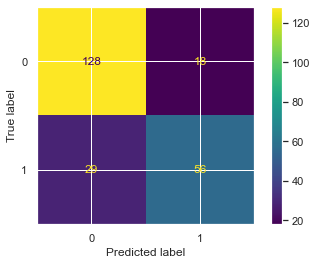

In [73]:
cm = confusion_matrix(y_test, predicted)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# Comparing the models

In [74]:
models = []
models.append(('Gaussian',GaussianNB() ))
models.append(("Logistic",LogisticRegression(max_iter=100, C = 100, class_weight= 'balanced')))
models.append(("SVM", svm.SVC(kernel='rbf' , class_weight='balanced')))
models.append(("DTs", DecisionTreeClassifier(criterion= 'entropy',ccp_alpha=0.00887155)))
models.append(("RF", RandomForestClassifier(n_estimators=300, criterion="entropy", max_features= 3)))
models.append(("Bagging", BaggingClassifier(svm.SVC(kernel="rbf", class_weight='balanced'), n_estimators= 200, max_features=5)))
models.append(("Boosting", AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), algorithm="SAMME.R", n_estimators=200)))
models.append(("KNN",KNeighborsClassifier(n_neighbors=20, weights="distance")))
              

In [75]:
# calculate the accuracy of each model 
names = []
scores = []
for name, model in models:
    if (name!="KNN" ):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
        names.append(name)
    else:
        model.fit(X_train_u, y_train_u)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
        names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})

print(tr_split)


       Name     Score
0  Gaussian  0.774892
1  Logistic  0.792208
2       SVM  0.805195
3       DTs  0.792208
4        RF  0.783550
5   Bagging  0.805195
6  Boosting  0.792208
7       KNN  0.783550


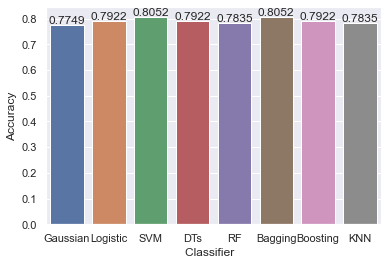

In [76]:
import matplotlib.pyplot as plt
axis = sn.barplot(x = 'Name', y = 'Score', data = tr_split)
axis.set(xlabel='Classifier  ', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
plt.show()

# Clustering

In [77]:
from sklearn import cluster
from sklearn.cluster import KMeans

### KMeans

In [78]:
kmeans = KMeans(n_clusters=2, n_init=30)

In [79]:
kmeans = kmeans.fit(X)

In [80]:
centroids = kmeans.cluster_centers_


In [81]:
 X["cluster"] = kmeans.labels_

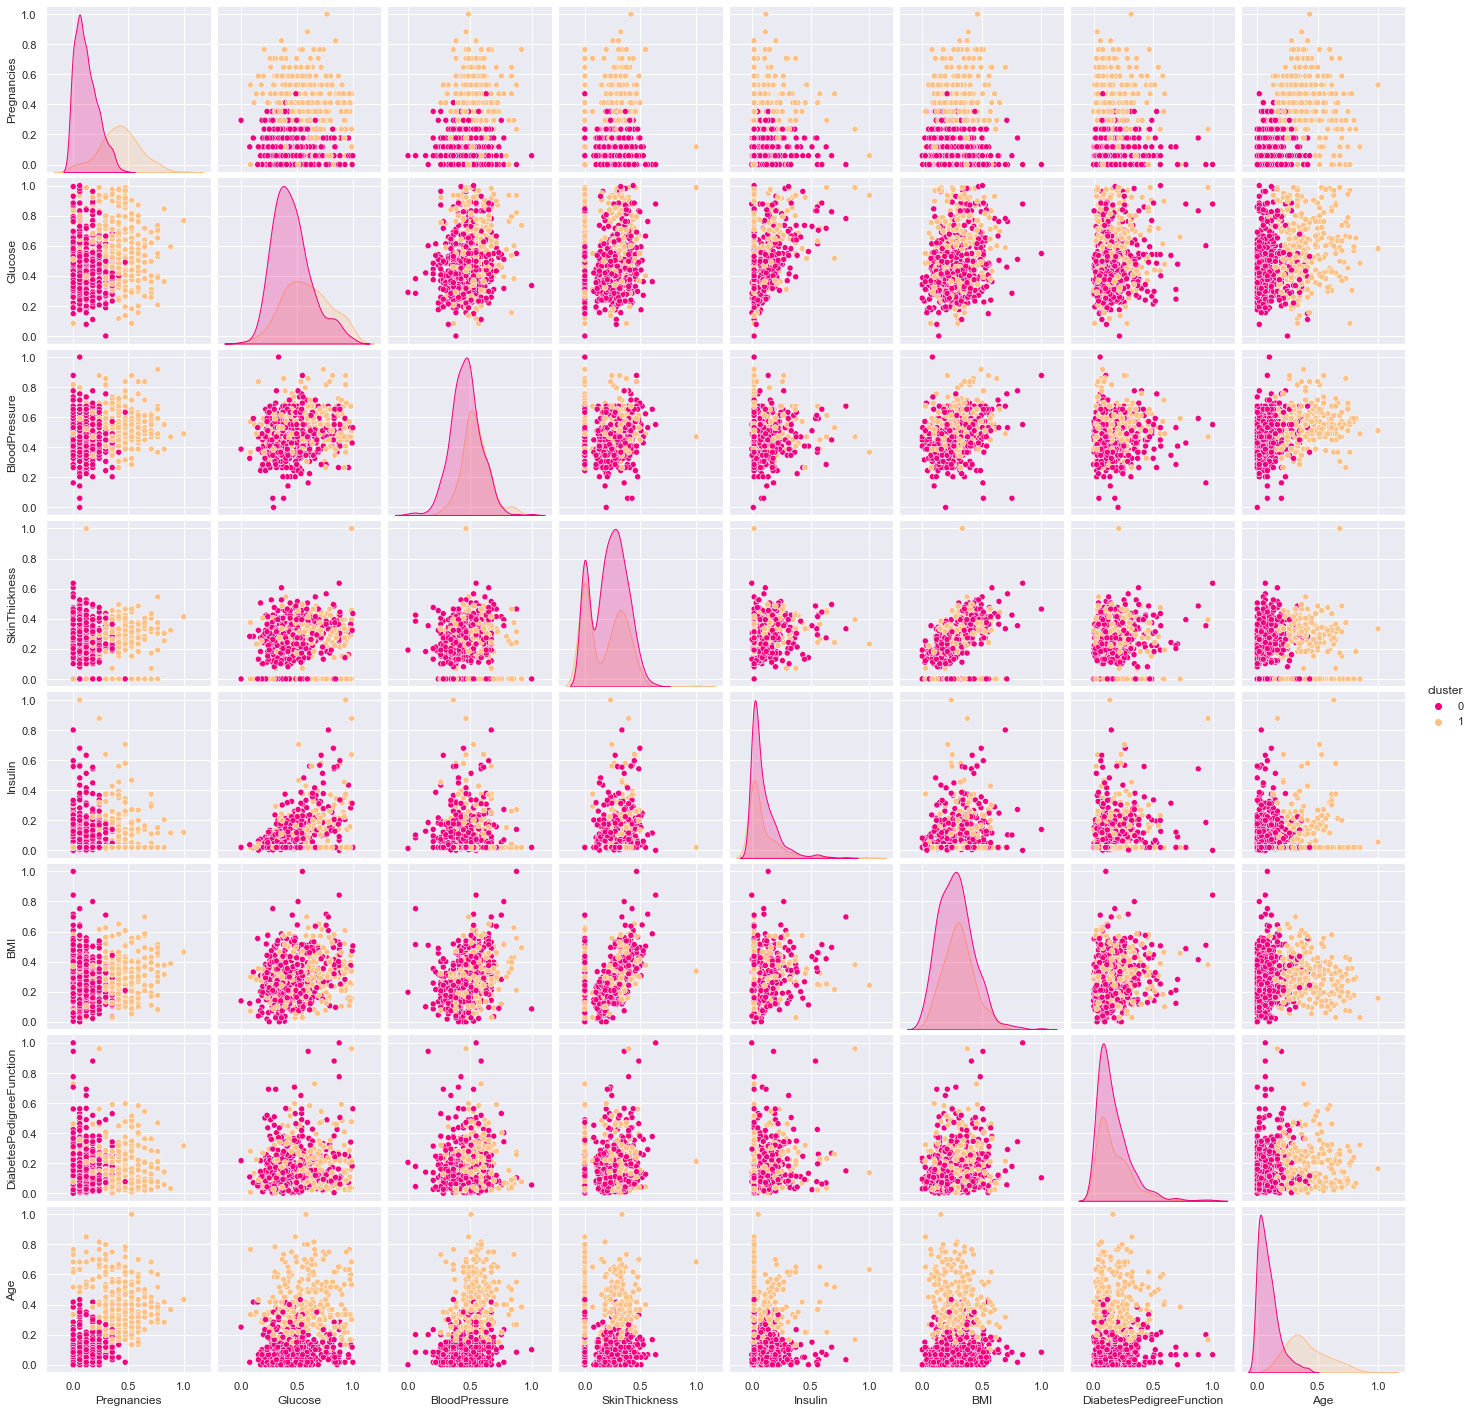

In [82]:
sn.pairplot(data = X, hue = "cluster", palette = "Accent_r")
plt.show()

In [83]:
from sklearn import metrics
import sklearn.metrics

In [84]:

k_to_test = range(2, 16, 1)
silhouette_scores = {}

for k in k_to_test:
    kmeans_k = KMeans( n_clusters =k)
    kmeans_k.fit(X.drop("cluster", axis = 1)) 
    labels_k = kmeans_k.labels_
    score_k = metrics.silhouette_score(X.drop("cluster", axis = 1), labels_k)
    silhouette_scores[k] = score_k
    print("Kmeans with k = %d\tSS: %5.4f" % (k, score_k))
    print("\n")

Kmeans with k = 2	SS: 0.2502


Kmeans with k = 3	SS: 0.2182


Kmeans with k = 4	SS: 0.2058


Kmeans with k = 5	SS: 0.1530


Kmeans with k = 6	SS: 0.1487


Kmeans with k = 7	SS: 0.1563


Kmeans with k = 8	SS: 0.1599


Kmeans with k = 9	SS: 0.1584


Kmeans with k = 10	SS: 0.1443


Kmeans with k = 11	SS: 0.1554


Kmeans with k = 12	SS: 0.1528


Kmeans with k = 13	SS: 0.1510


Kmeans with k = 14	SS: 0.1437


Kmeans with k = 15	SS: 0.1501




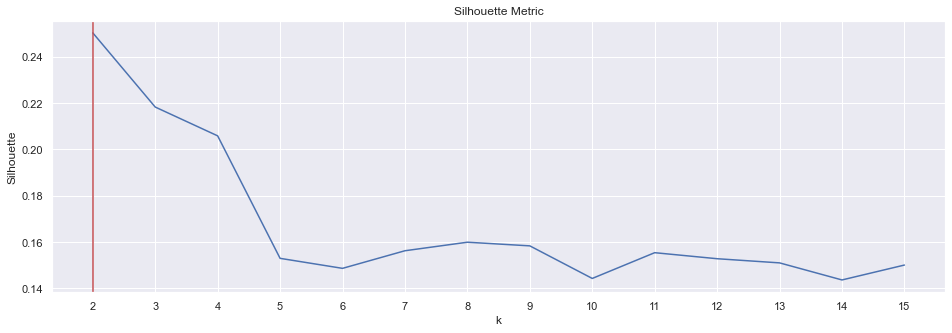

In [85]:
plt.figure(figsize = (16,5))
plt.plot(silhouette_scores.values())
plt.xticks(range(0,14,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(0, color = "r")
plt.show()

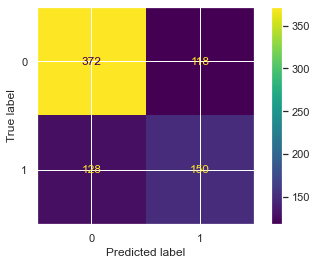

In [86]:
cm = confusion_matrix(X["cluster"], y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

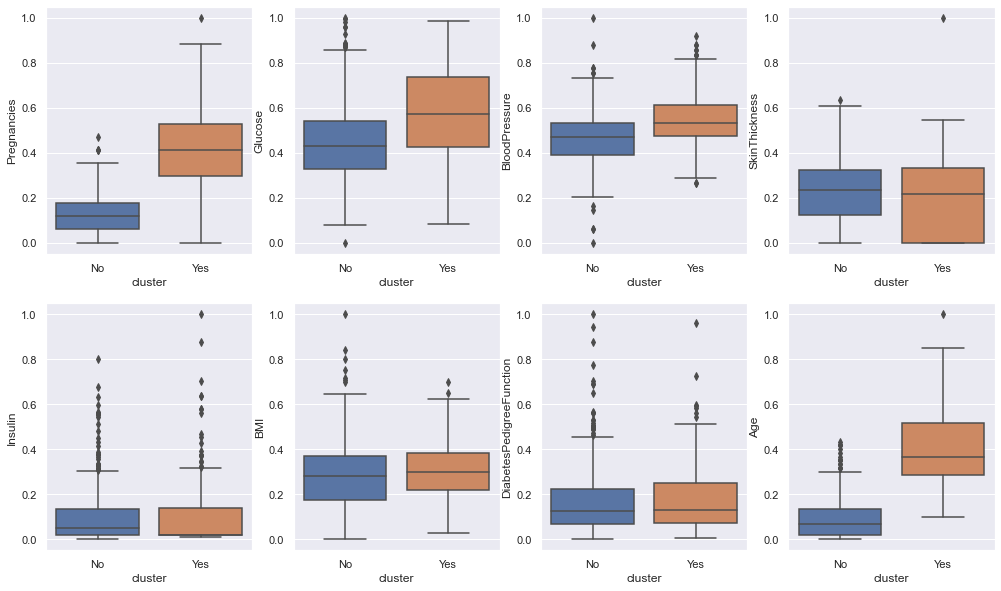

In [87]:
plt.figure( figsize=( 17.0, 10.0 ) )
for i in range( 8 ):
    plt.subplot( 2, 4, i + 1 )
    plt.grid( True )
    sn.boxplot( x=X["cluster"], y=X.columns[i], data=X )
    plt.xticks( [ 0, 1 ], [ 'No', 'Yes',], rotation=0 )
#plt.tight_layout( True )
plt.show()

### Affinity Propagation

In [88]:
from sklearn.cluster import AffinityPropagation

In [89]:
af =AffinityPropagation(max_iter = 250, preference=-10)          

In [90]:
af = af.fit(X)

In [91]:
labels = af.labels_

In [92]:
X["cluster"] = labels

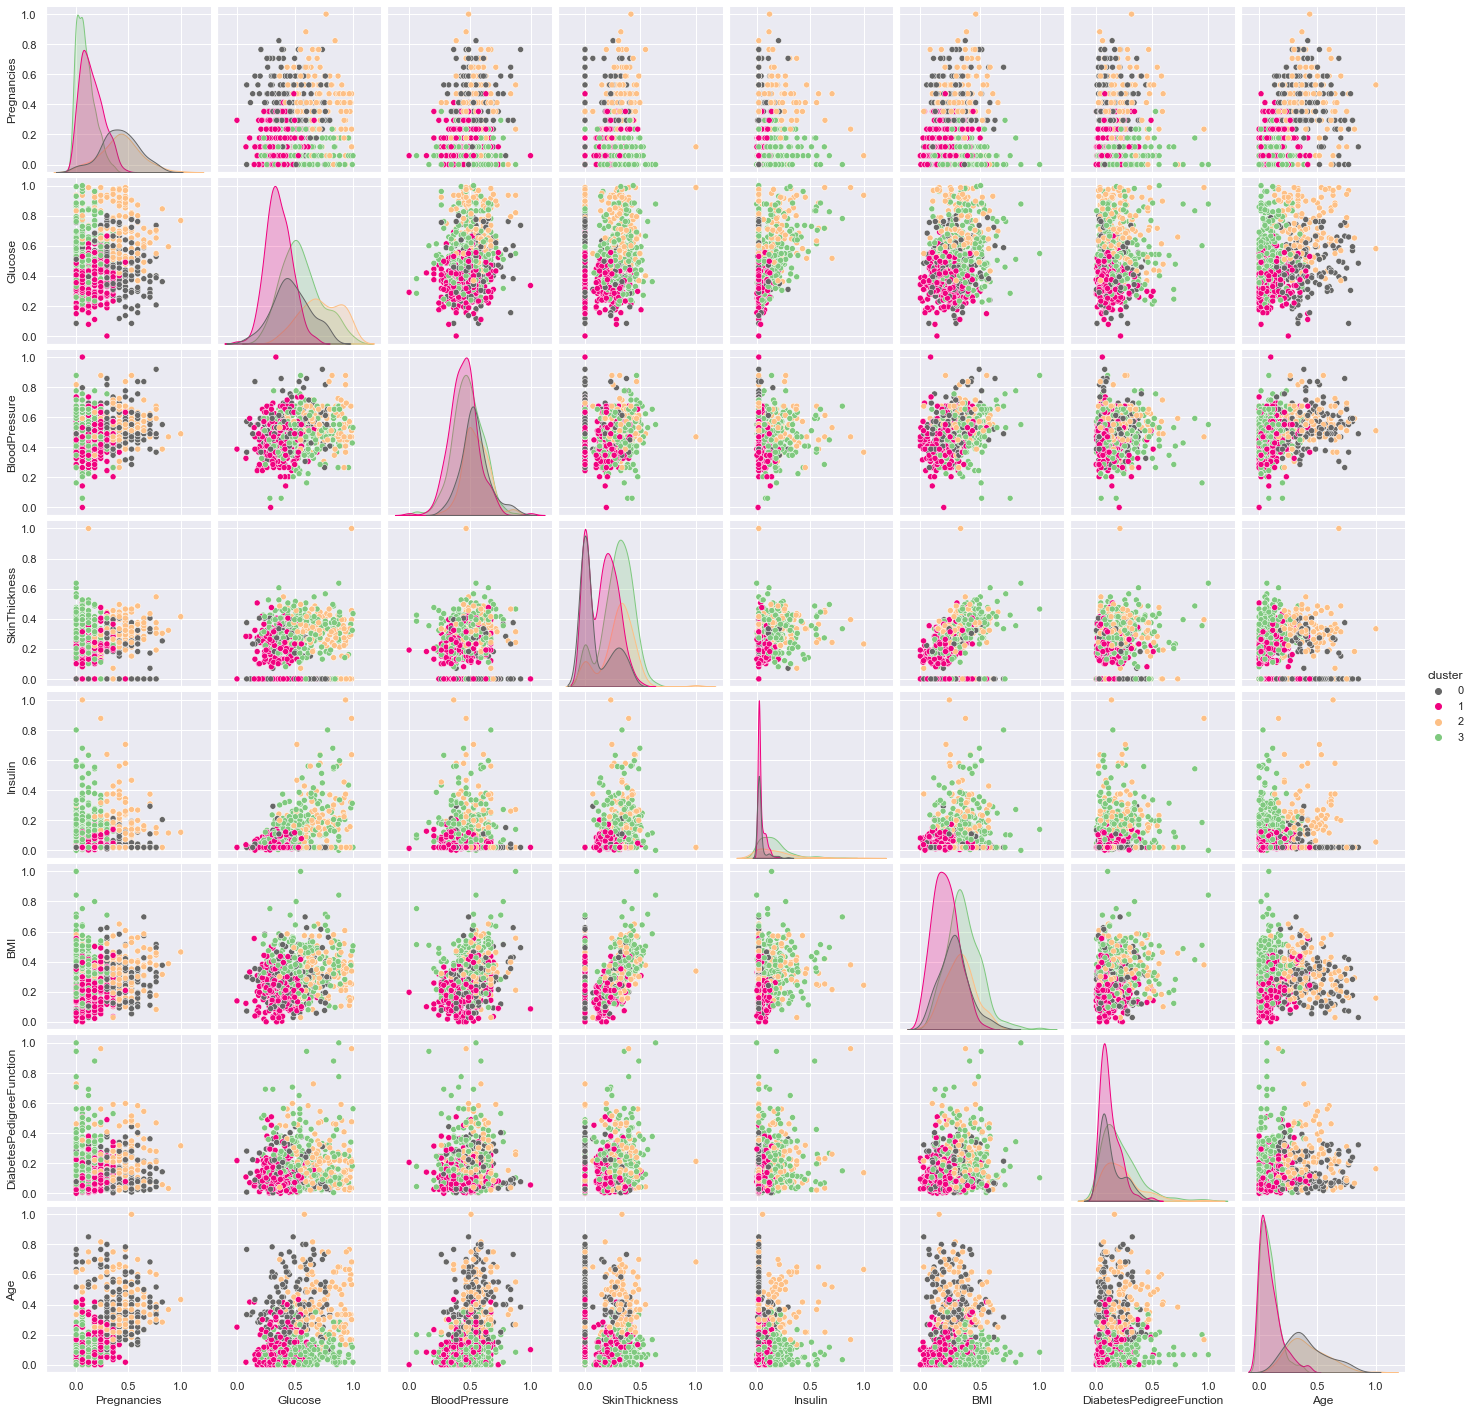

In [93]:
sn.pairplot(data = X, hue = "cluster", palette = "Accent_r")
plt.show()

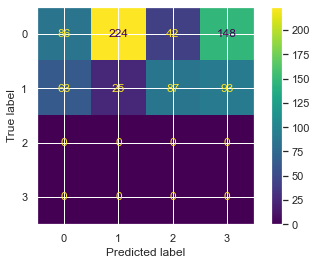

In [94]:
cm = confusion_matrix(y,X["cluster"])

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


# Principal Component Analysis


In [95]:
#Standardization
scaler = StandardScaler()

scaled_df=df.copy()
final_df=scaled_df.drop(['Outcome'],axis=1)

scaled1=pd.DataFrame(scaler.fit_transform(final_df), columns=final_df.columns)
scaled1.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.907270 -0.608201  0.167240   
1    -0.844885 -1.205066      -0.528319       0.530902 -0.608201 -0.851551   
2     1.233880  2.016662      -0.693761      -1.288212 -0.608201 -1.331838   
3    -0.844885 -1.073567      -0.528319       0.154533 -0.006185 -0.633239   
4    -1.141852  0.504422      -2.679076       0.907270  0.695378  1.549885   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
Principal_components=pca.fit_transform(XX)
pca_df = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6','PC7','PC8'])
print(pca_df)

         PC 1      PC 2      PC 3      PC 4      PC 5      PC 6       PC7  \
0    1.295132 -0.723744 -0.308086  0.535685  0.443034  0.385007  1.305837   
1   -1.543666  0.439956  0.248175  0.200739  0.579120 -0.596095  0.742527   
2   -0.066408 -1.348256 -2.028268 -0.021322 -1.033353  0.992484  0.136716   
3   -1.714696  0.842474  0.354911 -0.600905  0.408396 -0.441238 -0.061436   
4    1.468775  3.488429 -2.416858  4.249291 -0.784960  1.664609  0.259668   
..        ...       ...       ...       ...       ...       ...       ...   
763  1.785365 -1.371812 -0.076787 -0.327301  2.811258 -0.816173  0.603463   
764 -0.314728  0.597545  0.847352 -0.160210 -0.043535  0.574815  0.418506   
765 -0.469286 -0.232018 -0.319261 -0.679489  0.429586 -0.465455  0.035790   
766 -0.978002 -0.849627 -0.712782 -0.198331 -0.648450  0.712912  0.661564   
767 -1.288865  0.836447  0.816939 -0.001764  0.342788 -0.351684  0.462631   

          PC8  
0   -0.042248  
1    0.266936  
2   -1.497418  
3    0.0280

In [97]:
for_visual = pd.concat([pca_df, df['Outcome']], axis = 1)
print(for_visual)

         PC 1      PC 2      PC 3      PC 4      PC 5      PC 6       PC7  \
0    1.295132 -0.723744 -0.308086  0.535685  0.443034  0.385007  1.305837   
1   -1.543666  0.439956  0.248175  0.200739  0.579120 -0.596095  0.742527   
2   -0.066408 -1.348256 -2.028268 -0.021322 -1.033353  0.992484  0.136716   
3   -1.714696  0.842474  0.354911 -0.600905  0.408396 -0.441238 -0.061436   
4    1.468775  3.488429 -2.416858  4.249291 -0.784960  1.664609  0.259668   
..        ...       ...       ...       ...       ...       ...       ...   
763  1.785365 -1.371812 -0.076787 -0.327301  2.811258 -0.816173  0.603463   
764 -0.314728  0.597545  0.847352 -0.160210 -0.043535  0.574815  0.418506   
765 -0.469286 -0.232018 -0.319261 -0.679489  0.429586 -0.465455  0.035790   
766 -0.978002 -0.849627 -0.712782 -0.198331 -0.648450  0.712912  0.661564   
767 -1.288865  0.836447  0.816939 -0.001764  0.342788 -0.351684  0.462631   

          PC8  Outcome  
0   -0.042248        1  
1    0.266936        0  


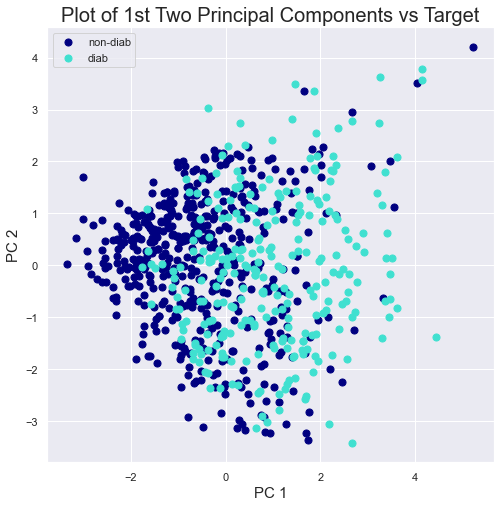

In [98]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Plot of 1st Two Principal Components vs Target', fontsize = 20)
diab = ['non-diab','diab']
group = [0,1]
colors = ['navy', 'turquoise']
for group, color in zip(group,colors):
    indicesToKeep = for_visual['Outcome'] == group
    ax.scatter(for_visual.loc[indicesToKeep, 'PC 1']
               , for_visual.loc[indicesToKeep, 'PC 2']
               , c = color
               , s = 50)

ax.legend(diab)
ax.grid(group)

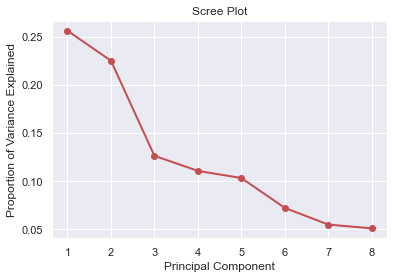

In [99]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

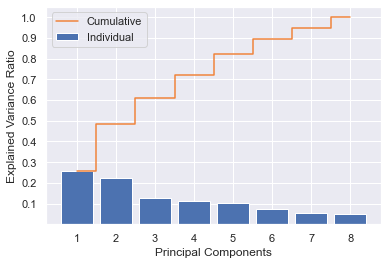

In [100]:
pca.fit_transform(XX)
pca_evr = pca.explained_variance_ratio_
pca_evr_cum = np.cumsum( pca_evr )
x = np.arange( 1, len( pca_evr ) + 1 )
k = np.linspace( 0.1, 1, 10 )
plt.bar( x, pca_evr, alpha=1, align='center', label='Individual' )
plt.step( x, pca_evr_cum, where='mid', label='Cumulative', color=sn.colors.xkcd_rgb.get( 'dusty orange' ) )
plt.ylabel( 'Explained Variance Ratio' )
plt.xlabel( 'Principal Components' )
plt.legend()
plt.xticks( x )
plt.yticks( k )
plt.show()

In [101]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)  
out_sum = np.cumsum(pca.explained_variance_ratio_)  
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.25660594 0.22533412 0.12638702 0.11068762 0.10324803 0.07210951
 0.05478258 0.05084519]
Cumulative Prop. Variance Explained:  [0.25660594 0.48194005 0.60832708 0.71901469 0.82226272 0.89437223
 0.94915481 1.        ]


In [102]:
print(pca.explained_variance_) 

[2.05552396 1.80502323 1.01241443 0.88665543 0.82706113 0.57762822
 0.43883201 0.40729183]


In [103]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'], index=scaled1.columns)
loadings

PC1       PC2       PC3       PC4       PC5  \
Pregnancies               0.263802 -0.492512 -0.143693  0.111114  0.516432   
Glucose                   0.464289 -0.020337 -0.312557 -0.365356 -0.470060   
BloodPressure             0.360465 -0.274598  0.520996 -0.013945 -0.339818   
SkinThickness             0.310657  0.447506  0.167055  0.035514  0.537323   
Insulin                   0.362888  0.364150 -0.399240 -0.359775  0.120232   
BMI                       0.424883  0.209155  0.536830  0.078515  0.012457   
DiabetesPedigreeFunction  0.239905  0.220034 -0.316734  0.842515 -0.265430   
Age                       0.344431 -0.506544 -0.185519  0.085321  0.151938   

                               PC6       PC7       PC8  
Pregnancies               0.181753 -0.367987 -0.468717  
Glucose                   0.334920  0.317157 -0.345151  
BloodPressure            -0.599330 -0.119539 -0.184575  
SkinThickness            -0.209177  0.531014 -0.244161  
Insulin                  -0.334172 -0.504380  0.257586  
BMI                       0.573352 -0.246432  0.302921  
DiabetesPedigreeFunction -0.067571 -0.069640 -0.063332  
Age                      -0.082909  0.384388  0.636687

# Hierarchical Clustering

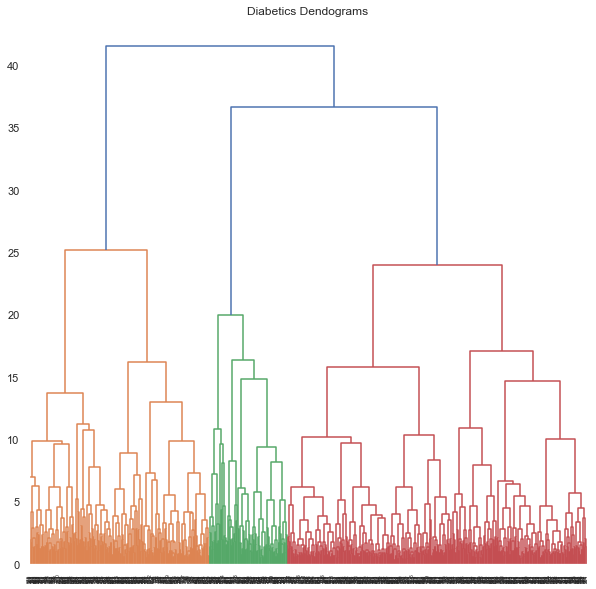

In [104]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 10))
plt.title("Diabetics Dendograms")
dend = shc.dendrogram(shc.linkage(XX, method='ward'))

In [105]:
from sklearn.cluster import AgglomerativeClustering

k_to_test = range(2, 8, 1)
silhouette_scores = {}

for k in k_to_test:
    aggClust = (AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward'))
    aggClust.fit(XX) 
    labels_A= aggClust.labels_
    score_A = metrics.silhouette_score(XX,labels_A)
    silhouette_scores[k] = score_A
    print("Kmeans with k = %d\tSS: %5.4f" % (k, score_A))
    print("\n")

Kmeans with k = 2	SS: 0.1667


Kmeans with k = 3	SS: 0.1768


Kmeans with k = 4	SS: 0.1663


Kmeans with k = 5	SS: 0.1034


Kmeans with k = 6	SS: 0.1125


Kmeans with k = 7	SS: 0.1082




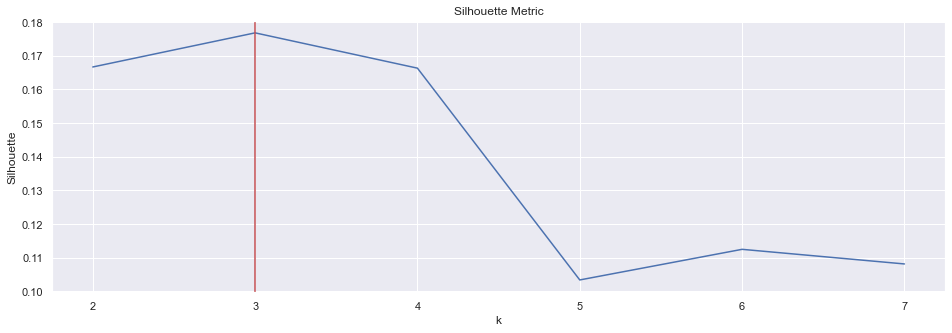

In [106]:
plt.figure(figsize = (16,5))
plt.plot(silhouette_scores.values())
plt.xticks(range(0,6,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(1, color = "r")
plt.show()

In [107]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
out=cluster.fit_predict(XX)


In [108]:
labels = cluster.labels_


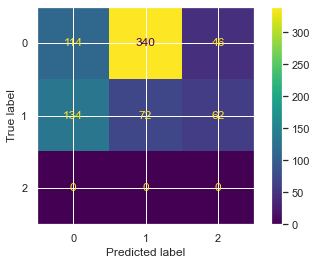

In [109]:
cm = confusion_matrix(y,labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

[[114 134   0]
 [340  72   0]
 [ 46  62   0]]


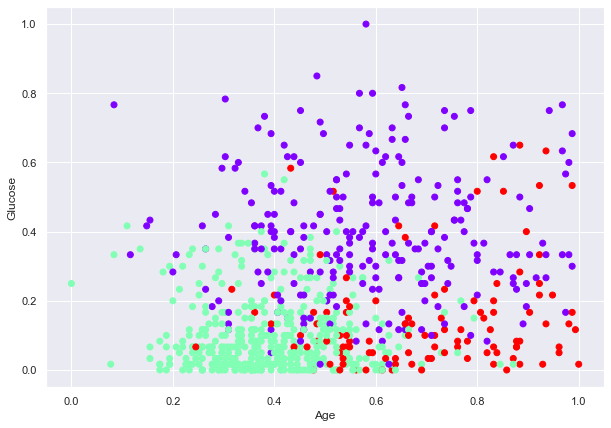

In [110]:
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:,1], X.iloc[:,7], c=cluster.labels_, cmap='rainbow')  #glucose and age 
plt.xlabel("Age")
plt.ylabel("Glucose")
cm = confusion_matrix(out,df.Outcome)
print(cm)